**This is an unsupervised learning task because we are trying to find a find patterns in the data**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

In [ ]:
fn = pd.read_csv('data_h3.csv')

In [5]:
fn.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
len(fn)

200

**200 total observation**

In [7]:
fn.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**There are no missing values**

In [9]:
for c in fn.columns:
    print(c)
    print(fn[c].nunique())
    print("")

CustomerID
200

Gender
2

Age
51

Annual Income (k$)
64

Spending Score (1-100)
84



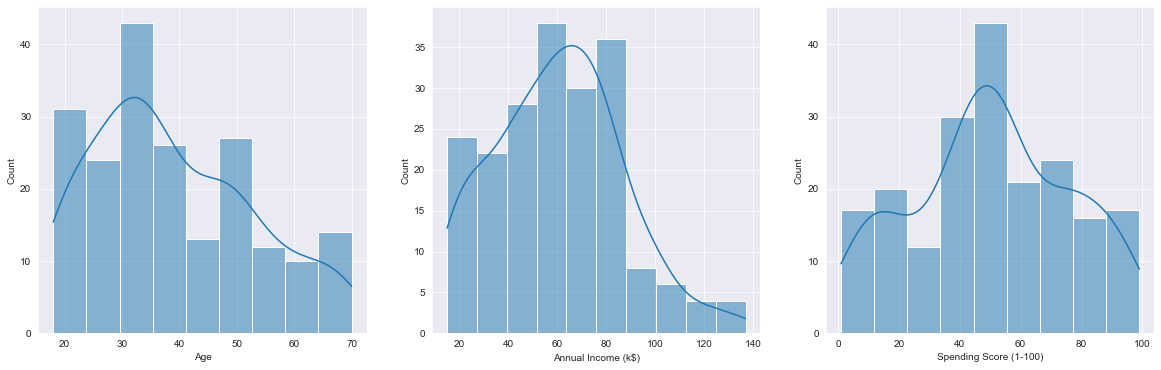

In [14]:
fig,ax = plt.subplots(1,3, figsize = (20,6))
sns.histplot(data = fn, x = "Age", kde = True, ax = ax[0])
sns.histplot(data = fn, x = "Annual Income (k$)", kde = True, ax = ax[1])
sns.histplot(data = fn, x = "Spending Score (1-100)", kde = True, ax = ax[2])

**It is evident that majority of people are between 20-40 with an annual income between 50-80 and a spending score between 40-60.**

([<matplotlib.patches.Wedge at 0x7fbf209a5ba8>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751365, -1.080515974257694, 'Male')])

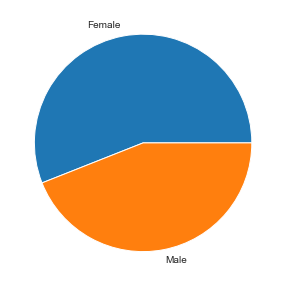

In [25]:
plt.pie(fn["Gender"].value_counts(), labels = ["Female", "Male"])

**It is apparent that the majority of people in the data are females.**

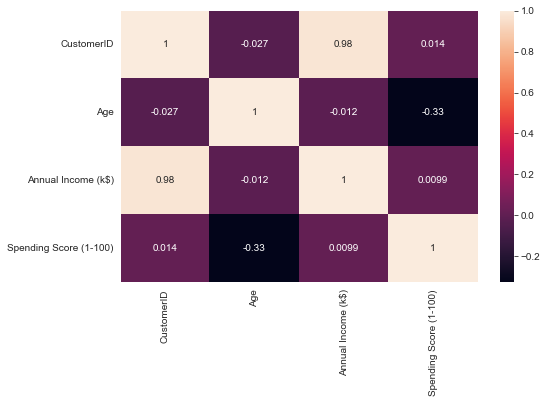

In [29]:
sns.heatmap(fn.corr(), annot = True)

**The only apparent multicollinearity within the dataset is between CustomerID and annual income.**

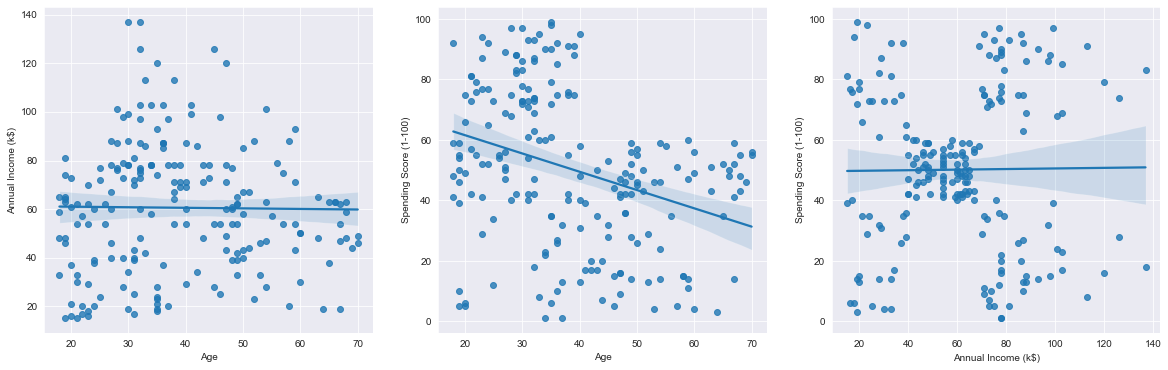

In [32]:
fig,ax = plt.subplots(1,3, figsize = (20,6))
sns.regplot(data = fn, x = "Age", y = "Annual Income (k$)", ax = ax[0])
sns.regplot(data = fn, x = "Age", y = "Spending Score (1-100)", ax = ax[1])
sns.regplot(data = fn, x = "Annual Income (k$)", y = "Spending Score (1-100)", ax = ax[2])

**The only relation apparent throughout the graphs is between spending score and age.**

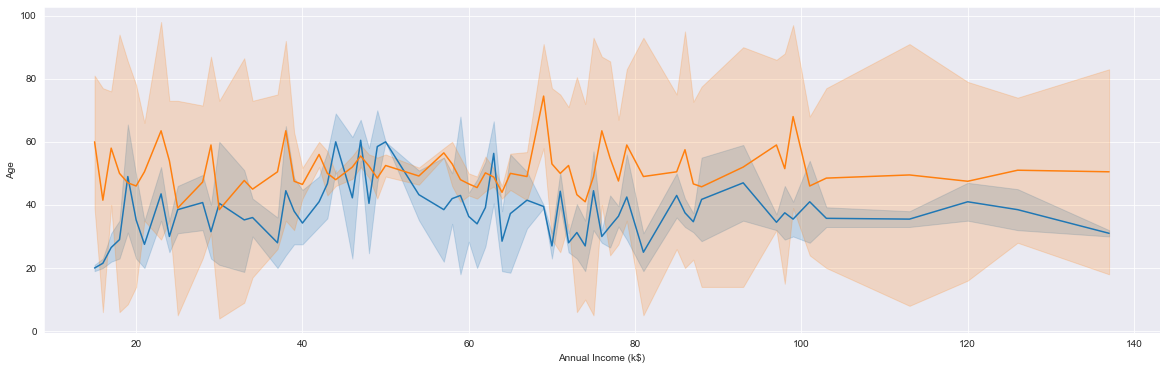

In [37]:
fig,ax = plt.subplots(1,1, figsize = (20,6))
sns.lineplot(data = fn, x = "Annual Income (k$)", y = "Age", ax =ax)
sns.lineplot(data = fn, x = "Annual Income (k$)", y = "Spending Score (1-100)", ax =ax)

**Based on the plot above it is evident there is no strong relationship between annual income with age and annual income with spending score.**

In [50]:
newData = fn[["Annual Income (k$)","Spending Score (1-100)"]]

In [51]:
from sklearn.cluster import KMeans
n_clusters = [2,4,6,8,10,12]
inertia = []
for k in n_clusters:
    kmeans = KMeans(init="k-means++", n_clusters=k , random_state=0)
    kmeans.fit(newData)
    inertia.append(kmeans.inertia_)
    


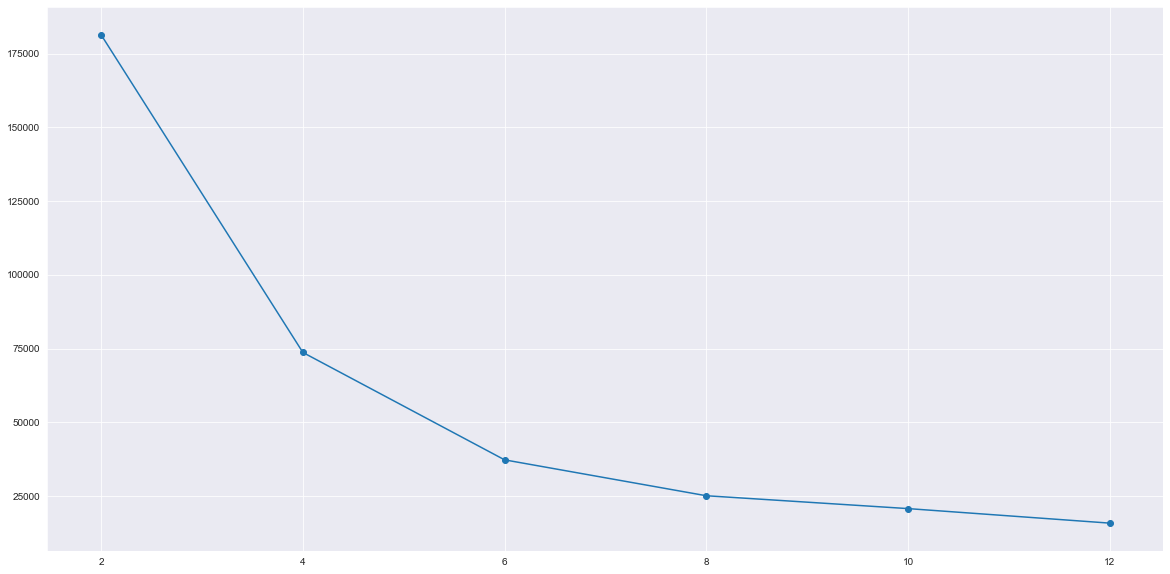

In [52]:
fig,ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(n_clusters, inertia)
ax.scatter(n_clusters, inertia)

In [53]:
kmeans = KMeans(init="k-means++", n_clusters=6 , random_state=0)
kmeans.fit(newData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [54]:
newData["Prediction"] = kmeans.predict(newData)

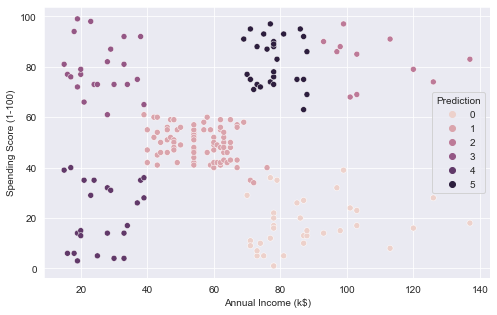

In [56]:
sns.scatterplot(data = newData,  x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Prediction")

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

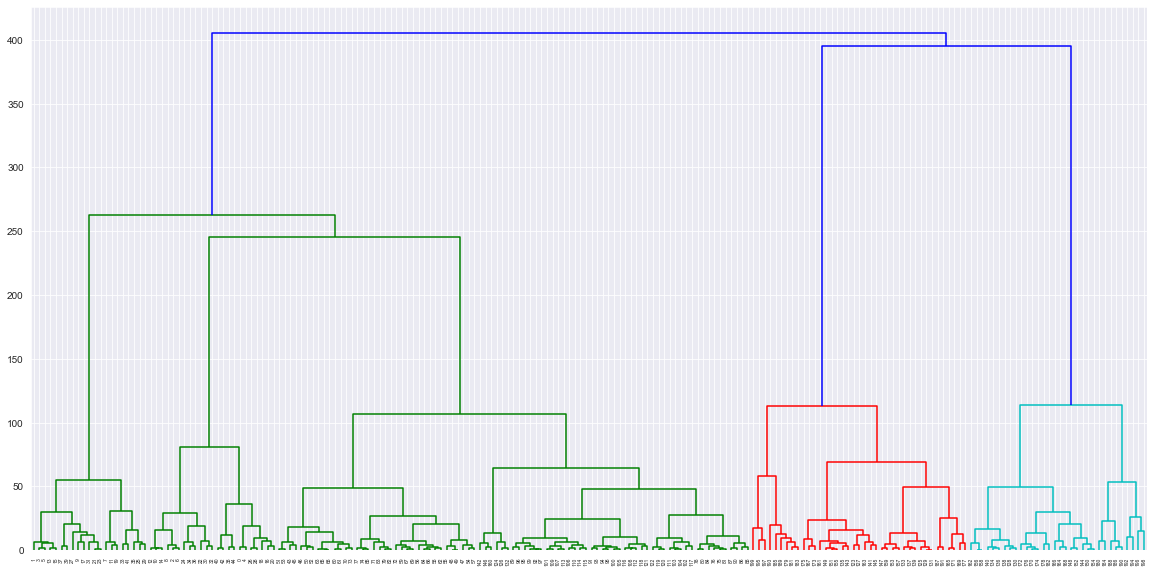

In [65]:
fig,ax = plt.subplots(1,1, figsize = (20,10))
z = linkage(newData[["Annual Income (k$)","Spending Score (1-100)"]], "ward")
dendrogram(z)
plt.show()

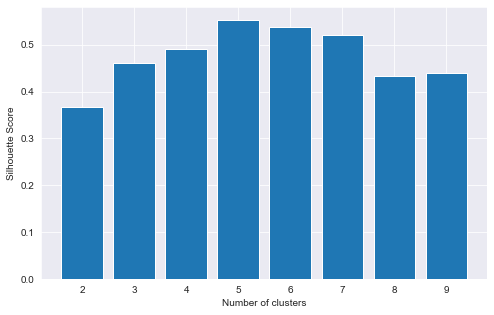

In [66]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score


silhouette_scores = [] 


for n_cluster in range(2, 10):
    silhouette_scores.append(silhouette_score(newData[["Annual Income (k$)","Spending Score (1-100)"]],
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(newData[["Annual Income (k$)","Spending Score (1-100)"]]))) 
    

plt.bar(x=range(2, 10), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

**By using k-Means and hierarchical clustering I obtained a differnet number of number of clusters with k-Means having 6 and hierarchical clustering having 5 optimal number of clusters. An advantage of using k-Means easy to visualize the clusters and is it best used when seperating data points based on different variables. However a disadvantage of using k-Means is that it is harder to determine the optimal number of k to determine the most efficent model. Also an advantage of using hierarchical clustering is that it is easy to implement and it is best used when dealing with ordered variables. However hierarchical clustering does not always provide the best solution and the dendrogram can be hard to interpret.**

**The results highlight the performance and insights gained from applying both K-Means and Hierarchical clustering on the dataset. The dataset includes 200 observations with no missing values, primarily focusing on Annual Income, Spending Score, and Age. Initial exploratory analysis reveals most individuals are aged 20–40, with annual incomes between $50k–80k and spending scores of 40–60. Gender distribution indicates a female majority. A correlation heatmap identified no significant multicollinearity apart from CustomerID and Annual Income.

For K-Means clustering, the inertia plot determined six clusters as optimal, visualized using a scatterplot based on Annual Income and Spending Score. Hierarchical clustering with Ward's linkage resulted in five clusters, supported by a dendrogram and silhouette analysis. Silhouette scores revealed variations in cluster quality with different numbers of clusters. K-Means clustering proved advantageous for visualizing data separation based on variables but faced challenges in determining the optimal number of clusters (k). Conversely, hierarchical clustering was straightforward to implement, particularly for ordered variables, but the dendrogram's complexity and occasionally suboptimal solutions posed limitations.

In both methods, the relationship between features was weak, with no strong links between Annual Income, Age, or Spending Score. The insights gained emphasize the importance of selecting clustering methods based on dataset characteristics, balancing visualization needs, and interpretability.**